# Cotton Plant Disease PredictionUsing CNN

## Import libraries

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint



In [39]:
os.getcwd()

'C:\\Users\\IRON MAN\\Cotton Plant'

In [40]:
cd/Users/IRON MAN/Cotton Plant/Train

C:\Users\IRON MAN\Cotton Plant\Train


In [41]:
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

## See the Training Datasets & Shape Format

In [42]:
# loading dataset
data = []
labels = []
classes = 4
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (150,150), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(1951, 150, 150, 3) (1951,)


In [43]:
cd/Users/IRON MAN/Cotton Plant/Test

C:\Users\IRON MAN\Cotton Plant\Test


## See the Testing Datasets & Shape Format

In [44]:
# loading dataset
test_data = []
test_labels = []
classes = 4
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (150,150), interpolation = cv2.INTER_NEAREST)
        test_data.append(img)
        test_labels.append(i)
        
test_data = np.array(test_data)
test_labels = np.array(test_labels)
print(test_data.shape,test_labels.shape)

(36, 150, 150, 3) (36,)


In [51]:
cd/Users/IRON MAN/Cotton Plant/Test

C:\Users\IRON MAN\Cotton Plant\Test


In [52]:
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant',
 'test data comp files']

In [53]:
cd/Users/IRON MAN/Cotton Plant/val

C:\Users\IRON MAN\Cotton Plant\val


In [54]:
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [55]:
cd/Users/IRON MAN/Cotton Plant/Train

C:\Users\IRON MAN\Cotton Plant\Train


In [56]:
training_data_path = os.getcwd()

## Let's Rearrange the Data with the use of Data agumentation technique i.e ImageDataGenrator

In [57]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(training_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [58]:
# As you can see
os.listdir(os.getcwd())

['diseased cotton leaf',
 'diseased cotton plant',
 'fresh cotton leaf',
 'fresh cotton plant']

In [59]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [60]:
cd/Users/IRON MAN/Cotton Plant/val

C:\Users\IRON MAN\Cotton Plant\val


In [61]:
validation_data_path = os.getcwd()

## See the Valedation Datasets & Shape Format

In [62]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


In [63]:
valid_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [64]:
cd/Users/IRON MAN/Cotton Plant/Train

C:\Users\IRON MAN\Cotton Plant\Train


In [65]:
curr_path_train = os.getcwd()

## Let's Visualize the Training Datasets 

Text(0, 0.5, 'Number of Traingn images')

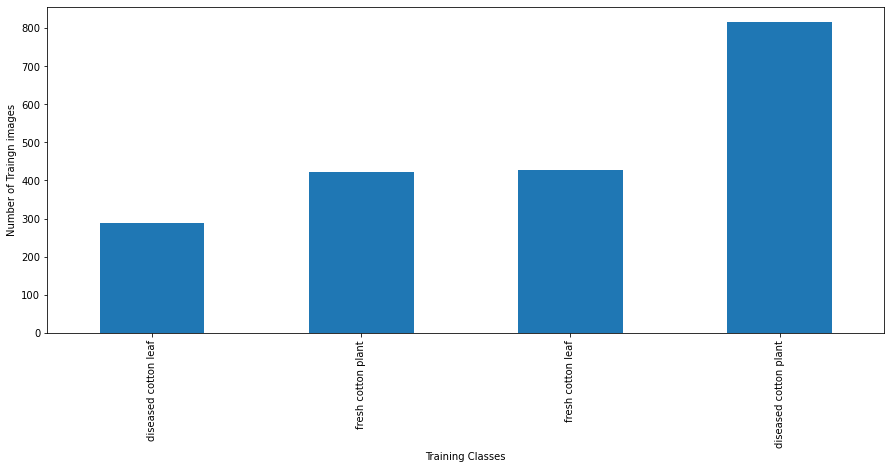

In [66]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(curr_path_train):
    data_dic[folder] = len(os.listdir(curr_path_train + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Training Classes')
plt.ylabel('Number of Traingn images')

In [67]:
cd/Users/IRON MAN/Cotton Plant/val

C:\Users\IRON MAN\Cotton Plant\val


In [68]:
cur_val_path = os.getcwd()

## Let's Visulize the valedation  DataSets

Text(0, 0.5, 'Number of Valedation images')

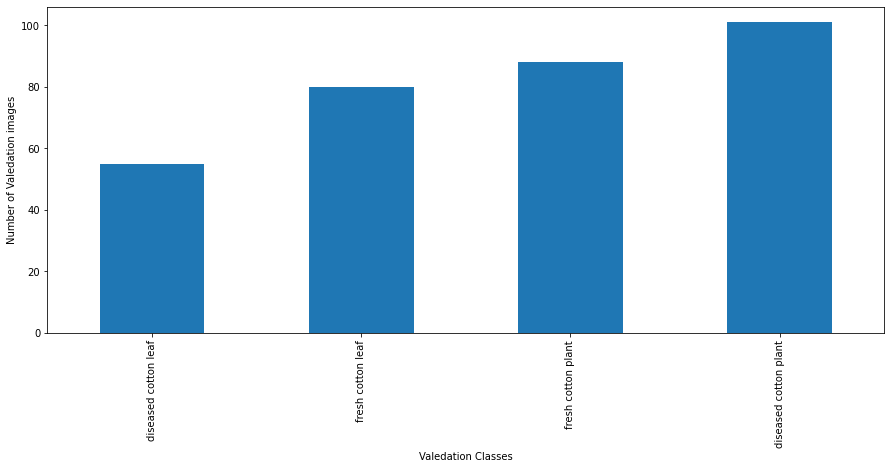

In [69]:
# number of images in each class for training datasets
data_dic = {}
for folder in os.listdir(cur_val_path):
    data_dic[folder] = len(os.listdir(cur_val_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Valedation Classes')
plt.ylabel('Number of Valedation images')

## Plot the Data Agumentations Images 

In [70]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

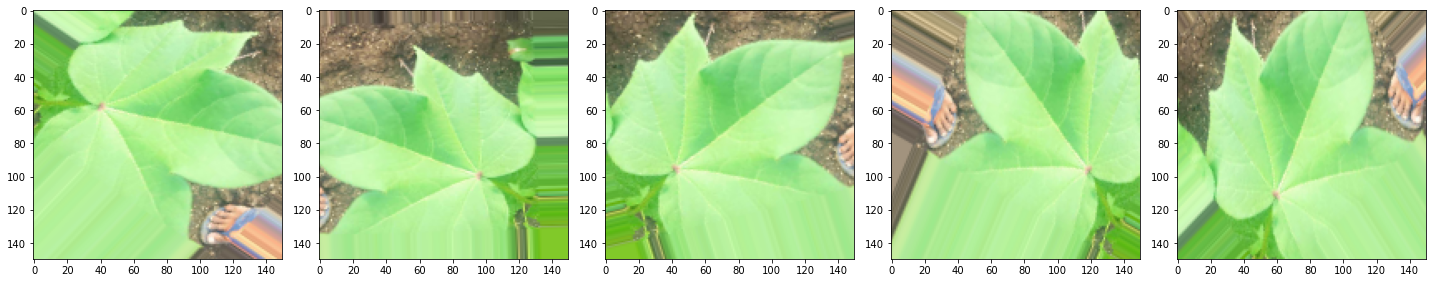

In [71]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)


In [72]:
cd/Users/IRON MAN/Cotton Plant

C:\Users\IRON MAN\Cotton Plant


In [96]:
# save best model using vall accuracy
model_path = 'Cotton Plant Disease.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Building the CNN model

In [74]:
#Building the model
model = Sequential()

# First Layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=[150, 150, 3]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Layer 
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))


# Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4, activation='softmax'))

In [75]:

# compile cnn model
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 142, 142, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 71, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 71, 71, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 69, 69, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 67, 67, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 33, 33, 64)       

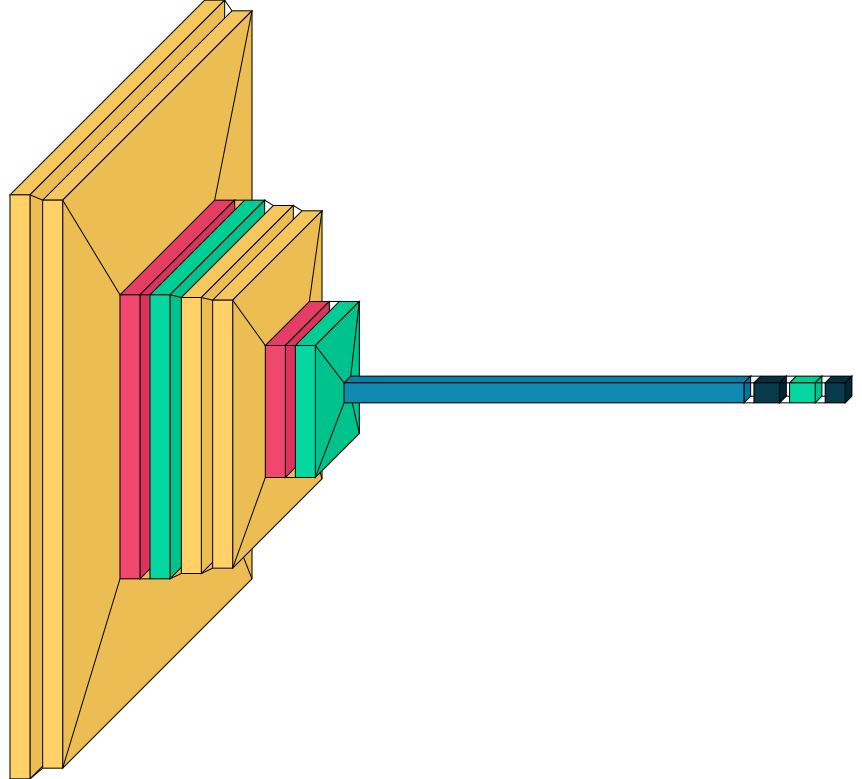

In [77]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model)

In [79]:
# train cnn model
history = model.fit(training_data,epochs=50, batch_size = 128, verbose=1, validation_data= valid_data) 

Epoch 1/50
61/61 [==============================] - 454s 7s/step - loss: 1.3314 - accuracy: 0.4162 - val_loss: 1.3769 - val_accuracy: 0.3117
Epoch 2/50
61/61 [==============================] - 360s 6s/step - loss: 1.3029 - accuracy: 0.4172 - val_loss: 1.3042 - val_accuracy: 0.3117
Epoch 3/50
61/61 [==============================] - 408s 7s/step - loss: 1.1699 - accuracy: 0.4798 - val_loss: 1.1196 - val_accuracy: 0.4784
Epoch 4/50
61/61 [==============================] - 344s 6s/step - loss: 1.1011 - accuracy: 0.5238 - val_loss: 1.0689 - val_accuracy: 0.4846
Epoch 5/50
61/61 [==============================] - 365s 6s/step - loss: 1.0700 - accuracy: 0.5418 - val_loss: 1.1208 - val_accuracy: 0.5401
Epoch 6/50
61/61 [==============================] - 302s 5s/step - loss: 1.0465 - accuracy: 0.5587 - val_loss: 1.0479 - val_accuracy: 0.5247
Epoch 7/50
61/61 [==============================] - 316s 5s/step - loss: 1.0057 - accuracy: 0.5695 - val_loss: 1.0098 - val_accuracy: 0.5340
Epoch 8/50
61

## Summarize History for accuracy

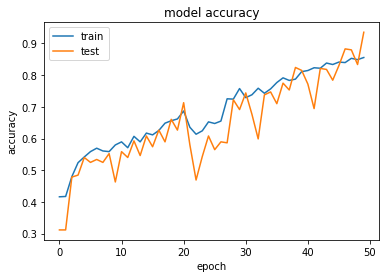

In [80]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Summarize History for Loss

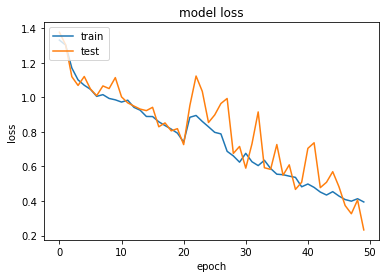

In [98]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 


In [99]:
history.history

{'loss': [1.331371545791626,
  1.3029167652130127,
  1.1698589324951172,
  1.1010675430297852,
  1.0699807405471802,
  1.0464972257614136,
  1.0057073831558228,
  1.0156420469284058,
  0.9936286211013794,
  0.98557448387146,
  0.972684383392334,
  0.9834712147712708,
  0.9419955015182495,
  0.9256045818328857,
  0.8893203735351562,
  0.8887606859207153,
  0.8584615588188171,
  0.8366628885269165,
  0.8162702322006226,
  0.7927598357200623,
  0.7404871582984924,
  0.8845431804656982,
  0.8951712846755981,
  0.8606159090995789,
  0.8295661807060242,
  0.7974238395690918,
  0.7884098887443542,
  0.6874806880950928,
  0.6609711647033691,
  0.6246885657310486,
  0.6758153438568115,
  0.6270933747291565,
  0.6048662066459656,
  0.6356039047241211,
  0.5880842804908752,
  0.5550994277000427,
  0.5522653460502625,
  0.5439035296440125,
  0.5366869568824768,
  0.48211750388145447,
  0.4983585774898529,
  0.47871583700180054,
  0.4516696631908417,
  0.4345135986804962,
  0.4539402425289154,
  0.

In [90]:
cd/Users/IRON MAN/Cotton Plant/Test

C:\Users\IRON MAN\Cotton Plant\Test


## Let's Test the model on testing Datasets

In [92]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [93]:
test_set = test_datagen.flow_from_directory(os.getcwd(),
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [94]:
y_pred = model.predict(test_set)

In [95]:
y_pred

array([[9.2592683e-07, 4.1471954e-02, 3.5401352e-04, 9.5817310e-01],
       [6.1254436e-06, 1.9014822e-01, 2.1274453e-03, 8.0771828e-01],
       [9.5510304e-06, 9.8286521e-01, 7.3548210e-05, 1.7051570e-02],
       [2.6755513e-06, 2.2995524e-02, 2.9659646e-03, 9.7403586e-01],
       [1.5199517e-01, 2.1034908e-03, 8.4440565e-01, 1.4956673e-03],
       [1.5279670e-02, 1.2036847e-03, 9.8263860e-01, 8.7807124e-04],
       [7.6372190e-03, 4.4082248e-04, 9.9095672e-01, 9.6525636e-04],
       [1.7664172e-09, 7.3682405e-02, 2.6518811e-07, 9.2631727e-01],
       [1.0497402e-09, 8.6715698e-02, 1.7451953e-07, 9.1328412e-01],
       [1.7928690e-02, 4.7566634e-04, 9.8058170e-01, 1.0139385e-03],
       [9.9999642e-01, 2.0482364e-06, 1.5918461e-06, 3.3418477e-08],
       [9.9992824e-01, 4.7257608e-06, 6.6796150e-05, 2.0733567e-07],
       [1.7603982e-06, 9.9549818e-01, 3.2165379e-05, 4.4679632e-03],
       [5.5882299e-07, 9.9824893e-01, 3.2878136e-06, 1.7472026e-03],
       [1.4257255e-01, 2.2854523e-